# problem_statement(50_startups)

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
startup=pd.read_csv(r"/content/50_Startups.csv")

In [3]:
type(startup)

pandas.core.frame.DataFrame

In [4]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup.shape

(50, 5)

In [7]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
startup.isna().sum()
# to find if any missing value

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
startup.corr()      
# to find correlations in variables

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
# we got R&D Spend & Profit corelated

# Scatterplot between variables along with histograms

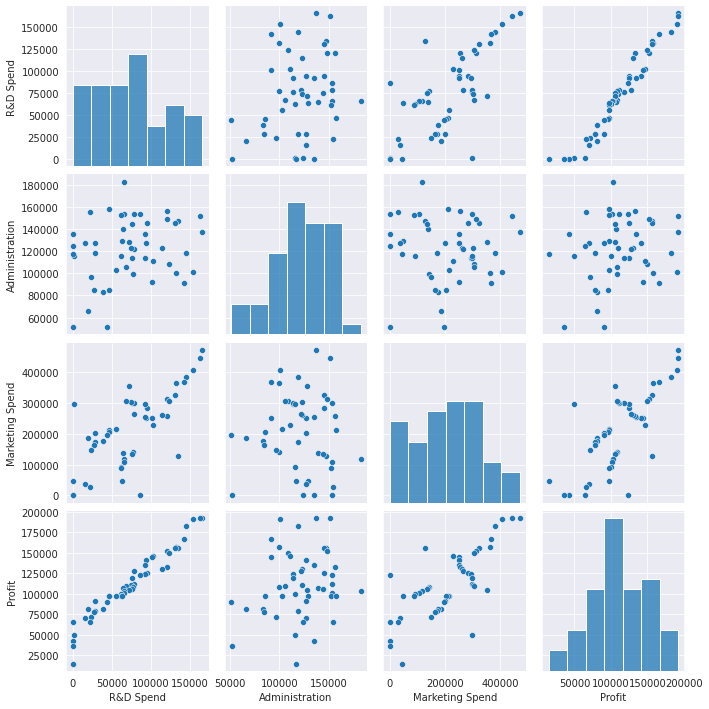

In [11]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup)

	R&D Spend vs Profit = +ve relation
    Administration vs Profit = -ve relation	
    Marketing Spend  vs Profit= +ve relation

In [12]:
su =startup.rename({'R&D Spend': 'RD','Administration':'ADM','Profit':'P', 'Marketing Spend':'MS'}, axis=1)

In [13]:
su

,RD,ADM,MS,State,P
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build a model

In [14]:
# building a model
import statsmodels.formula.api as smf
model=smf.ols('P~RD+ADM+MS',data=su).fit()

model

In [15]:
model.params

Intercept    50122.192990
RD               0.805715
ADM             -0.026816
MS               0.027228
dtype: float64

In [16]:
model.tvalues

Intercept     7.626218
RD           17.846374
ADM          -0.525507
MS            1.655077
dtype: float64

In [17]:
model.pvalues

Intercept    1.057379e-09
RD           2.634968e-22
ADM          6.017551e-01
MS           1.047168e-01
dtype: float64

 2.634968e-22 < 0.05 = True
 
 6.017551e-01 < 0.05 = False
 
 1.047168e-01 < 0.05 = False
 

Here RD is important variable than the other variables by p-value

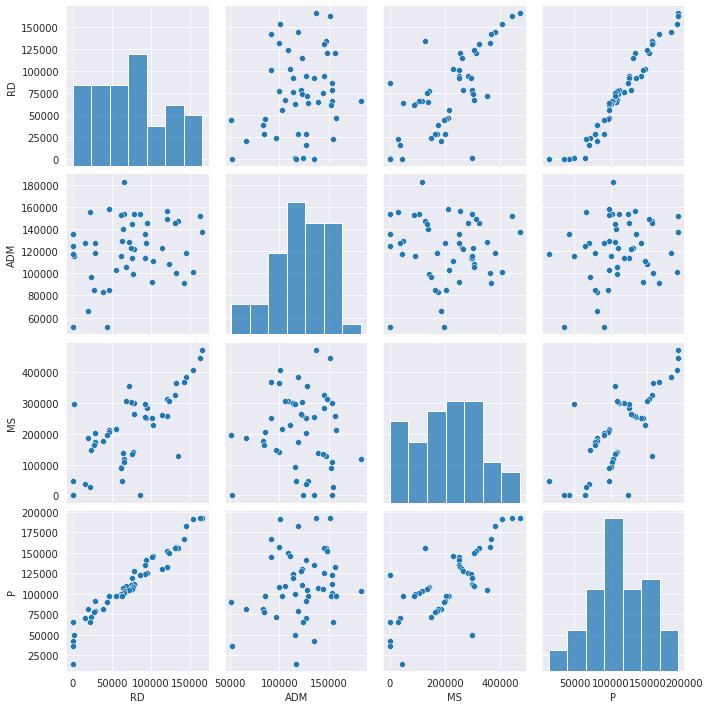

In [18]:
sns.pairplot(su)

In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Model

In [20]:
ml_ADM=smf.ols('P~ADM',data=su).fit()
# getting t-value and p-value
print(ml_ADM.tvalues, '\n', ml_ADM.pvalues)  

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [21]:
ml_MS=smf.ols('P~MS',data=su).fit()
# getting t-value and p-value
print(ml_MS.tvalues, '\n', ml_MS.pvalues)  

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [22]:
ml_ADM_MS=smf.ols('P~ADM+MS',data=su).fit()
# getting t-value and p-value
print(ml_ADM_MS.tvalues, '\n', ml_ADM_MS.pvalues)  

Intercept    1.142741
ADM          2.467779
MS           8.281039
dtype: float64 
 Intercept    2.589341e-01
ADM          1.729198e-02
MS           9.727245e-11
dtype: float64


In [23]:
# 1.729198e-02 = 0.017
# 9.727245e-11 = 0 approximately = 0

# in simple linear regression we get ADM and MS 
# to find if variables have corelation or not

# calculating VIF

In [24]:
rsq_RD = smf.ols('RD~ADM+MS',data=su).fit().rsquared  
vif_RD = 1/(1-rsq_RD) 

rsq_MS = smf.ols('MS~ADM+RD',data=su).fit().rsquared  
vif_MS = 1/(1-rsq_MS)

rsq_ADM = smf.ols('ADM~MS+RD',data=su).fit().rsquared  
vif_ADM= 1/(1-rsq_ADM)

# Storing vif values in a data frame
d1 = {'Variables':['RD','MS','ADM'],'VIF':[vif_RD,vif_MS,vif_ADM]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,MS,2.326773
2,ADM,1.175091


In [25]:
#non of them involve in colinearity as values of VIF < 20 
# so each variable is important as not involved in colinearity

# Residual Analysis
1. Test for Normality of Residual(Q-Q Plot)

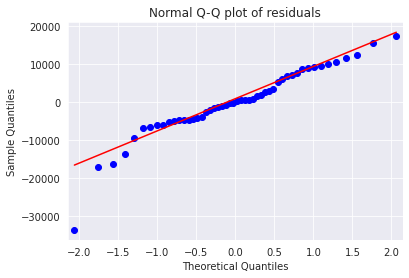

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

# Residual Plot for Homoscedasticity

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

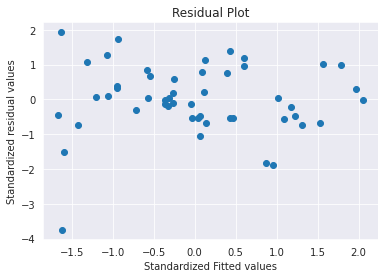

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [30]:
# here there are pattern of cluster and u-shaped

# Residual Vs Regressors

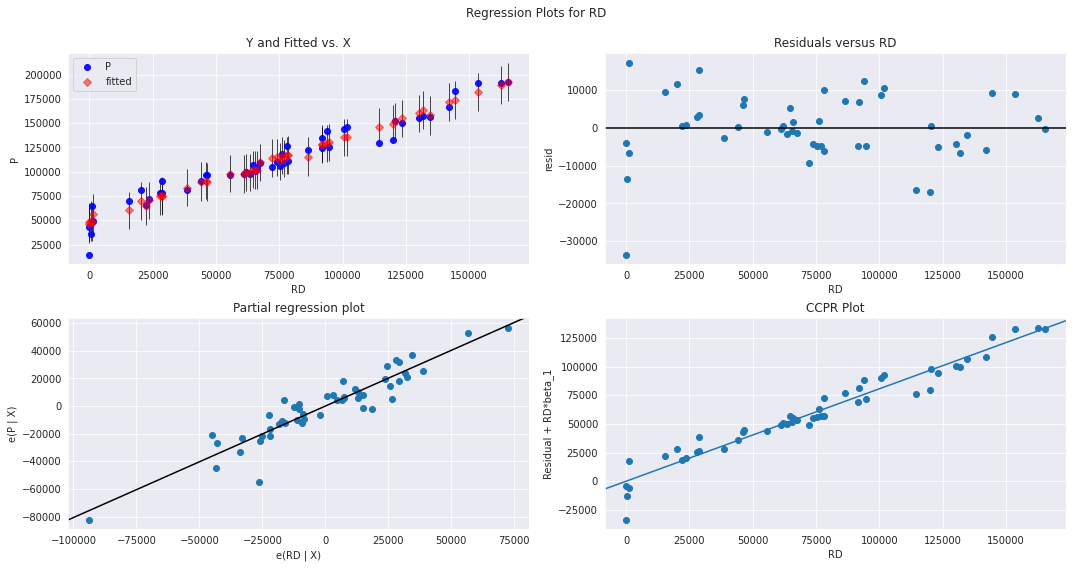

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

In the regression plot for RD -

for fitted vs X there is relation and shows value is imp

for residual vs RD there is cluster pattern i.e error is dependent on RD

for PRP there is slope that tells variable is imp

for CCPR there is slope which shows variable is imp

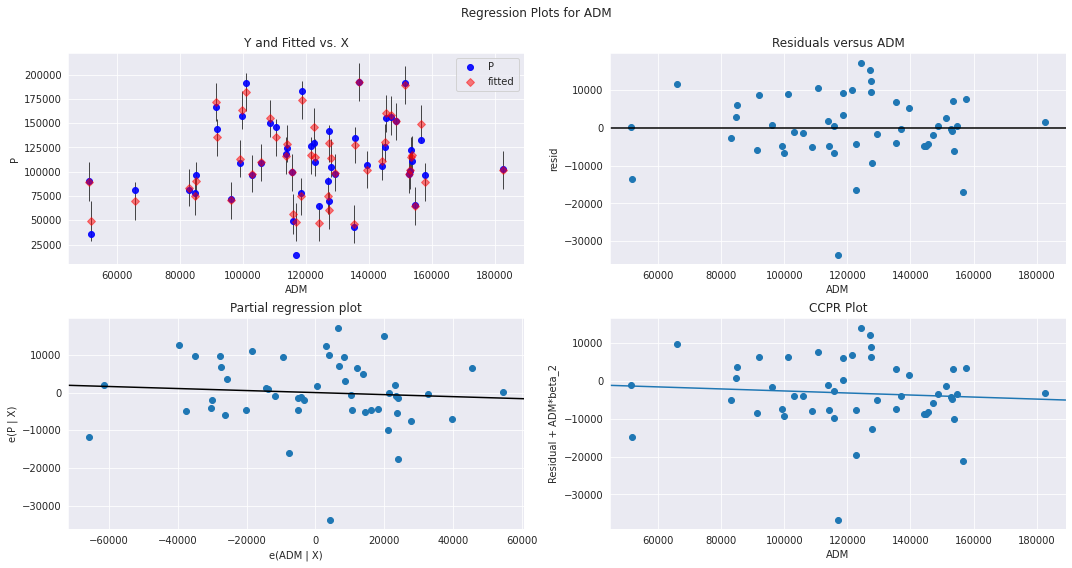

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

In the regression plot for ADM -

for fitted vs X there is relation and shows value is imp

for residual vs ADM there is cluster pattern i.e error is dependent on ADM

for PRP there is a slight slope

for CCPR there is a slight slope

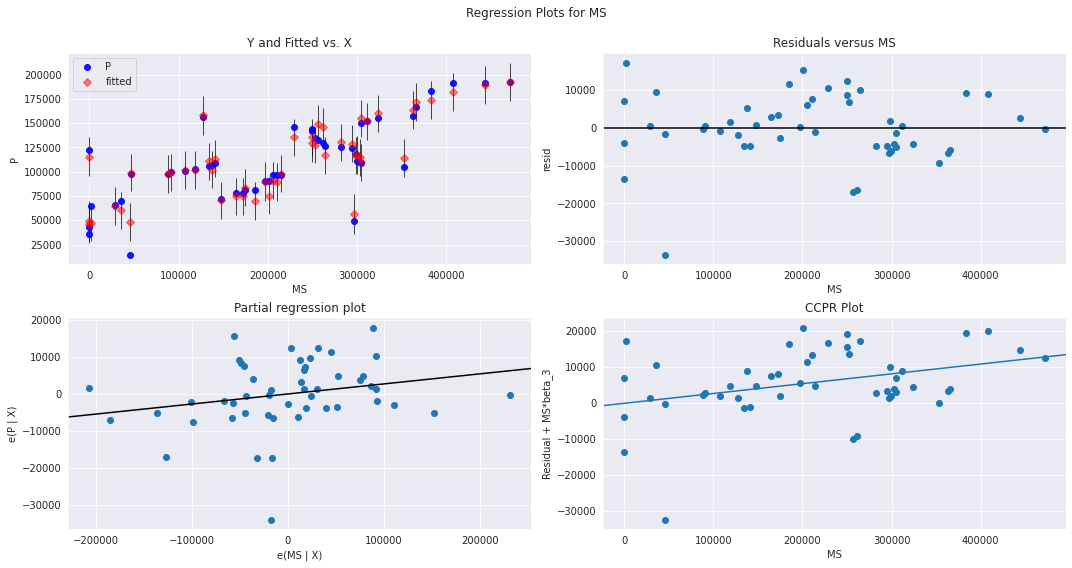

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

In the regression plot for MS -

for fitted vs X there is relation and shows value is imp

for residual vs MS there is cluster pattern i.e error is dependent on RD

for PRP there is slope that tells variable is imp

for CCPR there is slope which shows variable is imp

# Model Deletion Diagnostics

Detecting Influencers/Outliers

# Cook’s Distance

In [34]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


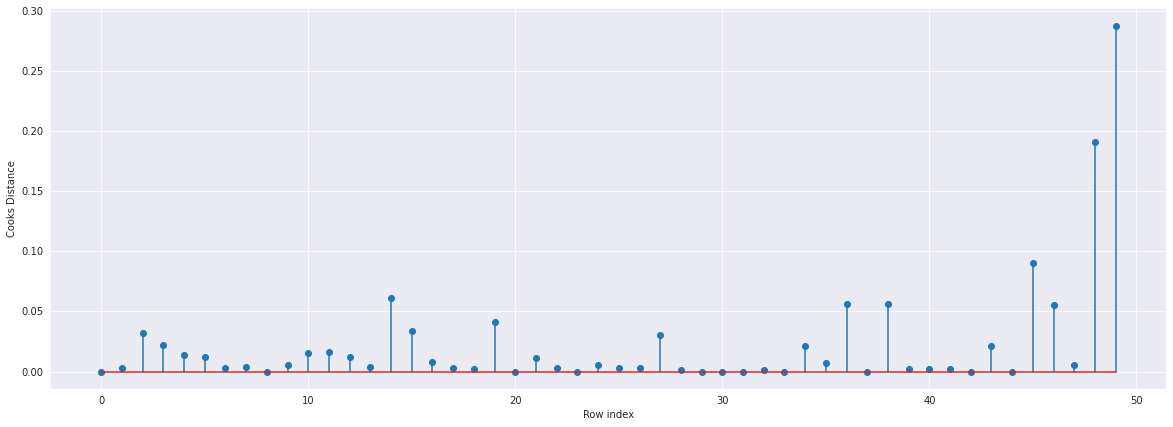

In [35]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(su)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

# High Influence points

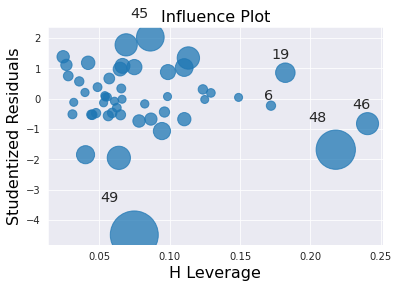

In [37]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [38]:
su.shape

(50, 5)

In [39]:
k = su.shape[1]
n = su.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

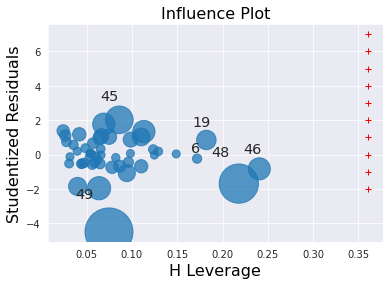

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,aplha=0.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [41]:
# there are no influencers

Since the value is <1 , we can stop the diagnostic process and finalize the model

# R- squared values for model

In [42]:
#Exclude variable "RD" and generate R-Squared values
final_ml_ADM= smf.ols('P~ADM+MS',data = su).fit()

#Exclude variable "ADM" and generate R-Squared values
final_ml_RD= smf.ols('P~RD+MS',data = su).fit()

#Exclude variable "MS" and generate R-Squared values
final_ml_MS= smf.ols('P~MS+RD',data = su).fit()

In [43]:
# Storing R-Squared values in a data frame
d1 = {'Variables':['RD','ADM','MS'],'R-Squared':[final_ml_ADM.rsquared,final_ml_RD.rsquared,final_ml_MS.rsquared]}
R_Squared_frame = pd.DataFrame(d1)  
R_Squared_frame

,Variables,R-Squared
0,RD,0.609723
1,ADM,0.950450
2,MS,0.950450


# Predicting dataset

In [44]:
pred_profit = model.predict(su)

In [45]:
su   # original dataset

,RD,ADM,MS,State,P
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
pred_profit

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


# problem_statement(Toyota Corolla)

Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [48]:
data = pd.read_csv("/content/ToyotaCorolla.csv",encoding="latin-1") 

In [49]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [51]:
data.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
print(type(data))
print(data.shape)
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
(1436, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_T

In [53]:
data.isna()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
data[data.duplicated()].shape

(0, 38)

In [55]:
data[data.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [56]:
data1=data.drop_duplicates()
data1

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [57]:
# "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [58]:
data=data.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [59]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [60]:
data1=data.rename({'Age_08_04':'Age','Quarterly_Tax':'QT','Weight':'WT'},axis=1)

In [61]:
data1

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


#Missing values and imputaion

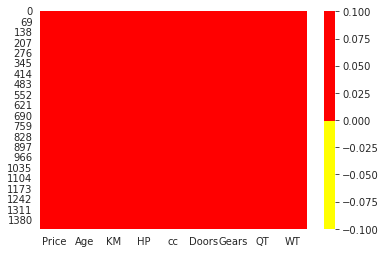

In [62]:
import seaborn as sns
cols=data1.columns
colours=["yellow","red"]  # if yellow - it is missing value
sns.heatmap(data1[cols].isnull(),
           cmap=sns.color_palette(colours))

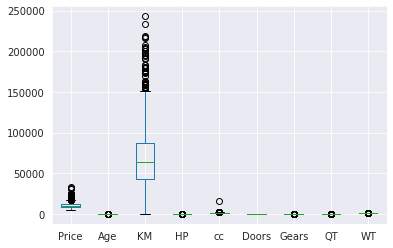

In [63]:
data1.boxplot()

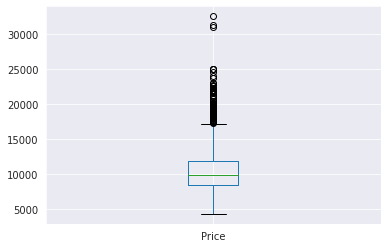

In [64]:
data1.boxplot(column="Price")

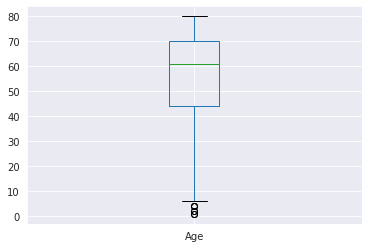

In [65]:
data1.boxplot(column="Age")

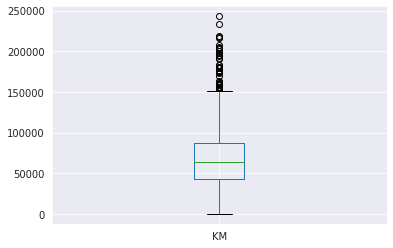

In [66]:
data1.boxplot(column="KM")

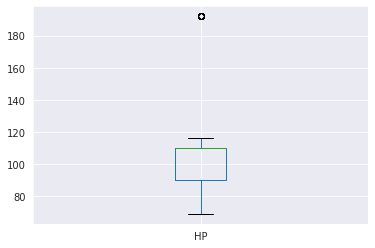

In [67]:
data1.boxplot(column="HP")

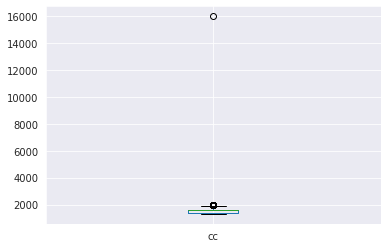

In [68]:
data1.boxplot(column="cc")

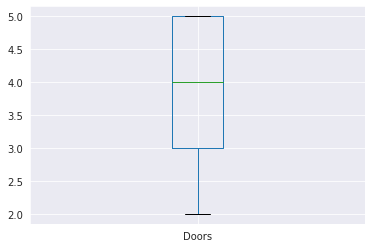

In [69]:
data1.boxplot(column="Doors")

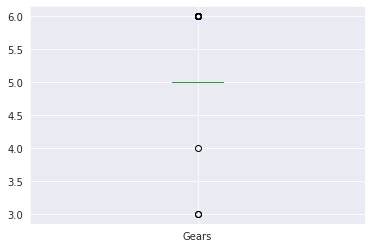

In [70]:
data1.boxplot(column="Gears")

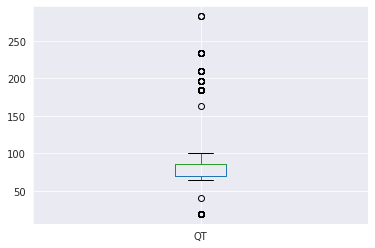

In [71]:
data1.boxplot(column="QT")

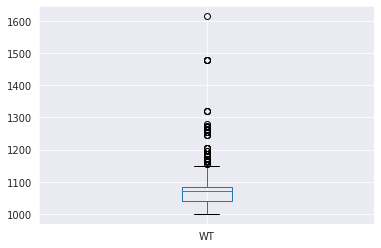

In [72]:
data1.boxplot(column="WT")

# Correlation

In [73]:
data1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables along with histograms

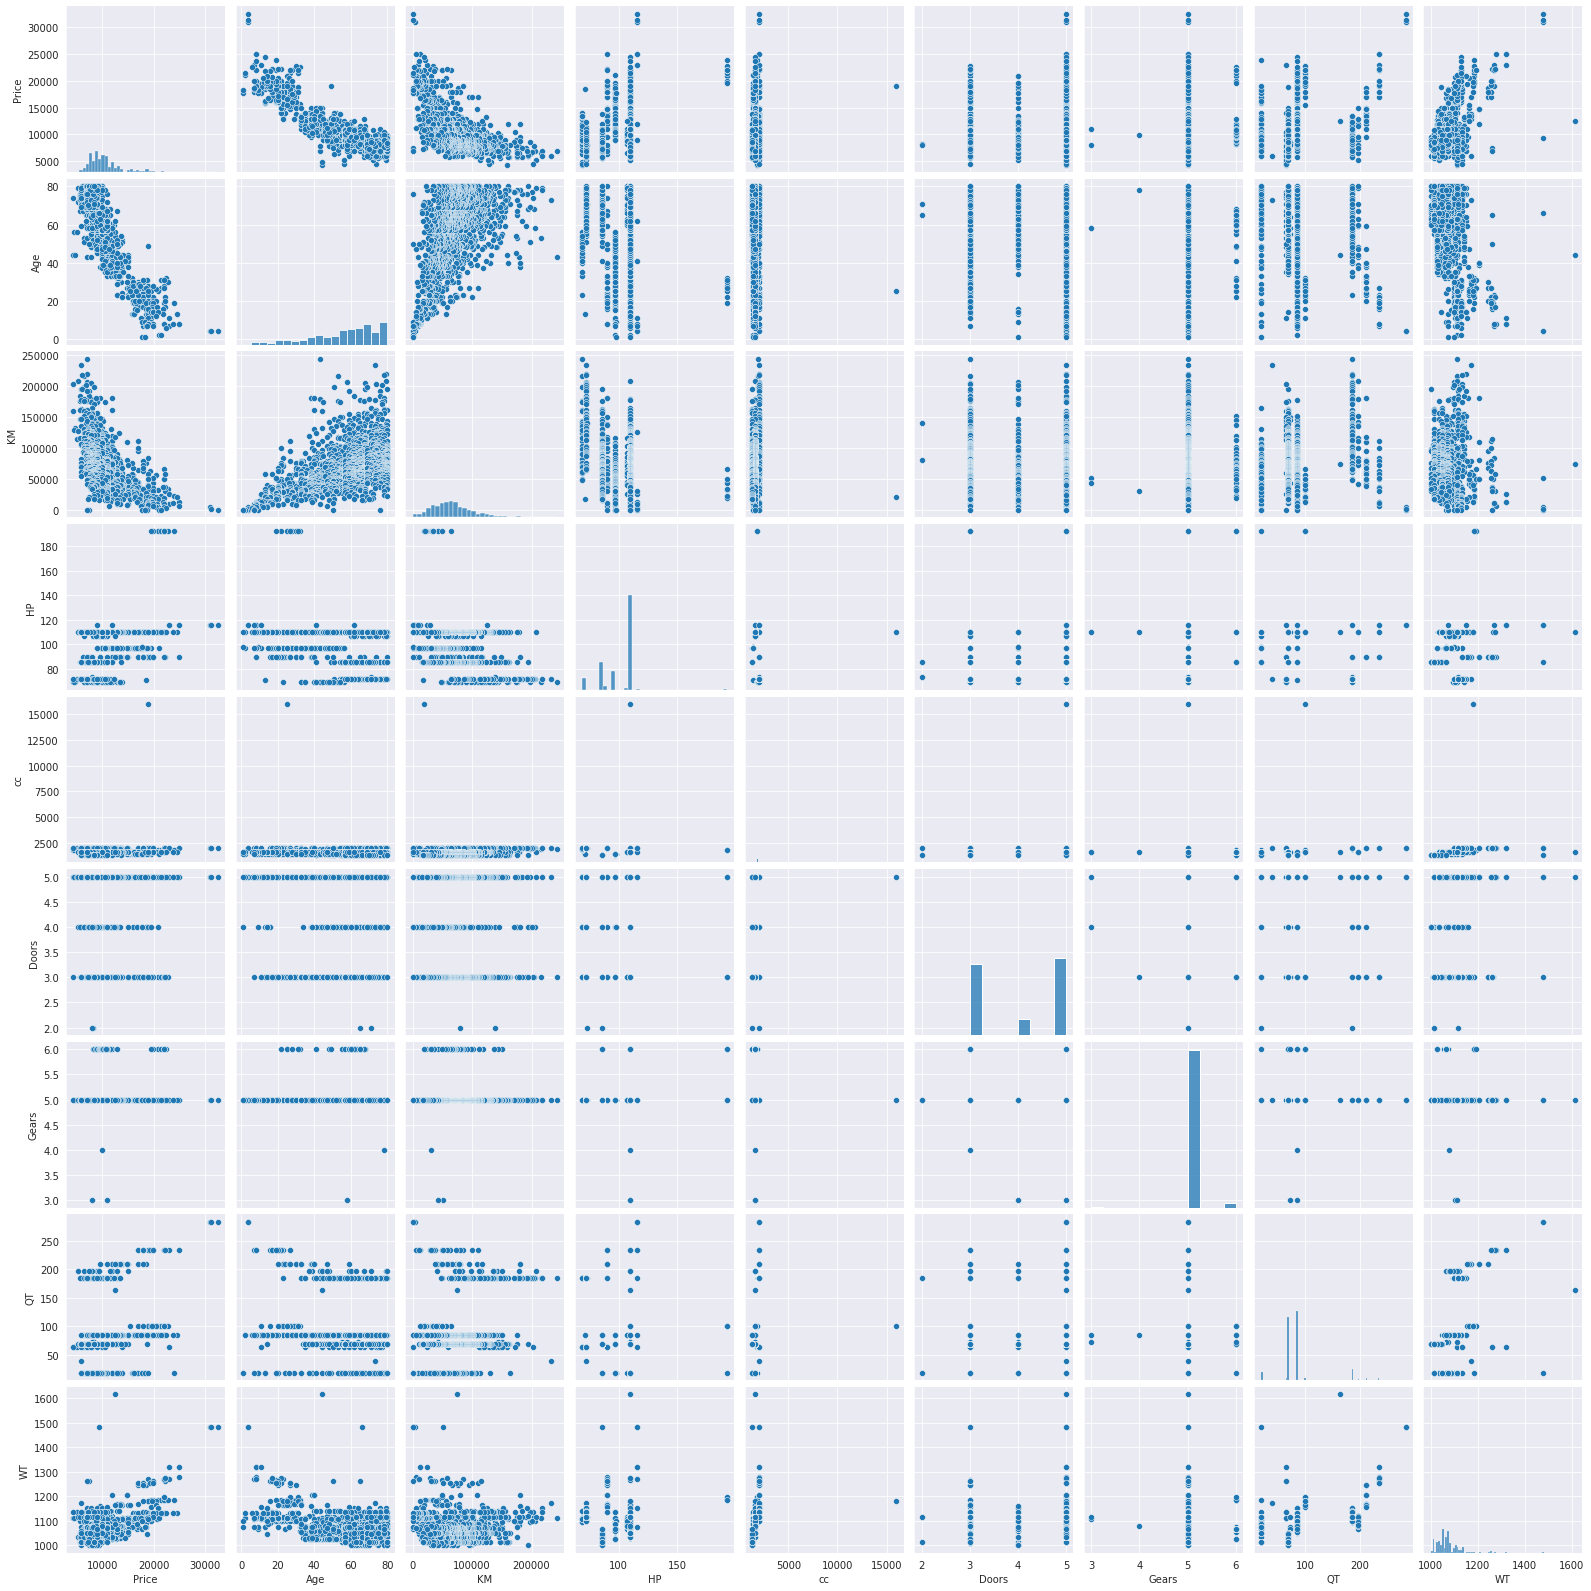

In [74]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

#Preparing a model

In [75]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=data1).fit()

In [76]:
model

In [77]:
# coefficients  (intercepts and slopes of all variables)
model.params  

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
WT             16.958632
dtype: float64

In [78]:
model.rsquared

0.8637627463428191

In [79]:
model.tvalues

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
QT            3.014535
WT           15.879803
dtype: float64

In [80]:
model.pvalues

Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
QT            2.619148e-03
WT            2.048576e-52
dtype: float64

Age

3.354724e-288  < 0.05 =True

KM

7.538439e-57 < 0.05 = True

HP               
3.757218e-28  < 0.05 = True

cc                
1.790902e-01 < 0.05 = False

Doors            
9.677716e-01 < 0.05 = False

Gears            
2.606549e-03 < 0.05 = True

QT     
2.619148e-03 < 0.05 = True

Weight            
2.048576e-52 < 0.05 = True

In [81]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

# Simple Linear Regression Models

In [82]:
ml_cc=smf.ols('Price~cc',data =data1).fit()  
#t and p-Values
print(ml_cc.tvalues, '\n', ml_cc.pvalues)  

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [83]:
ml_D=smf.ols('Price~Doors',data =data1).fit()  
#t and p-Values
print(ml_D.tvalues, '\n', ml_D.pvalues) 

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [84]:
ml_ccD=smf.ols('Price~cc+Doors',data =data1).fit()  
#t and p-Values
print(ml_ccD.tvalues, '\n', ml_ccD.pvalues) 

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


# Calculating VIF

In [85]:
#Age+KM+HP+cc+Doors+Gears+QT+WT
rsq_age=smf.ols("Age~KM+HP+cc+Doors+Gears+QT+WT",data=data1).fit().rsquared
vif_age= 1/(1-rsq_age)

rsq_KM=smf.ols("KM~Age+HP+cc+Doors+Gears+QT+WT",data=data1).fit().rsquared
vif_KM= 1/(1-rsq_KM)

rsq_HP=smf.ols("HP~Age+KM+cc+Doors+Gears+QT+WT",data=data1).fit().rsquared
vif_HP= 1/(1-rsq_HP)

rsq_cc=smf.ols("cc~Age+KM+HP+Doors+Gears+QT+WT",data=data1).fit().rsquared
vif_cc= 1/(1-rsq_cc)

rsq_Doors=smf.ols("Doors~Age+KM+HP+cc+Gears+QT+WT",data=data1).fit().rsquared
vif_Doors= 1/(1-rsq_Doors)

rsq_Gears=smf.ols("Gears~Age+KM+HP+cc+Doors+QT+WT",data=data1).fit().rsquared
vif_Gears= 1/(1-rsq_Gears)

rsq_QT=smf.ols("QT~Age+KM+HP+cc+Doors+Gears+WT",data=data1).fit().rsquared
vif_QT= 1/(1-rsq_QT)

rsq_WT=smf.ols("WT~Age+KM+HP+cc+Doors+Gears+QT",data=data1).fit().rsquared
vif_WT= 1/(1-rsq_WT)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QT','WT'],'VIF':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_WT]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,WT,2.516420


non of them involve in colinearity as values of VIF < 20 

so each variable is important as not involved in colinearity

# Residual Analysis

# Test for Normality of Residual (Q-Q Plot)

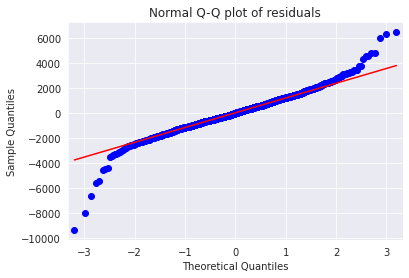

In [86]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [87]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058])]

In [88]:
list(np.where(model.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960])]

There are residuals before -4000 and above 4000 in  above graph 

# Residual Plot for Homoscedasticity

In [89]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

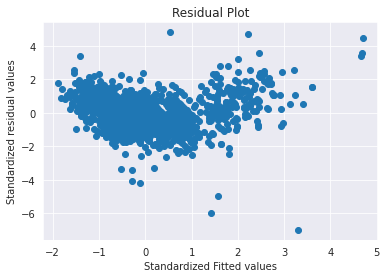

In [90]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

there are clusters in the graph

# Residual Vs Regressors

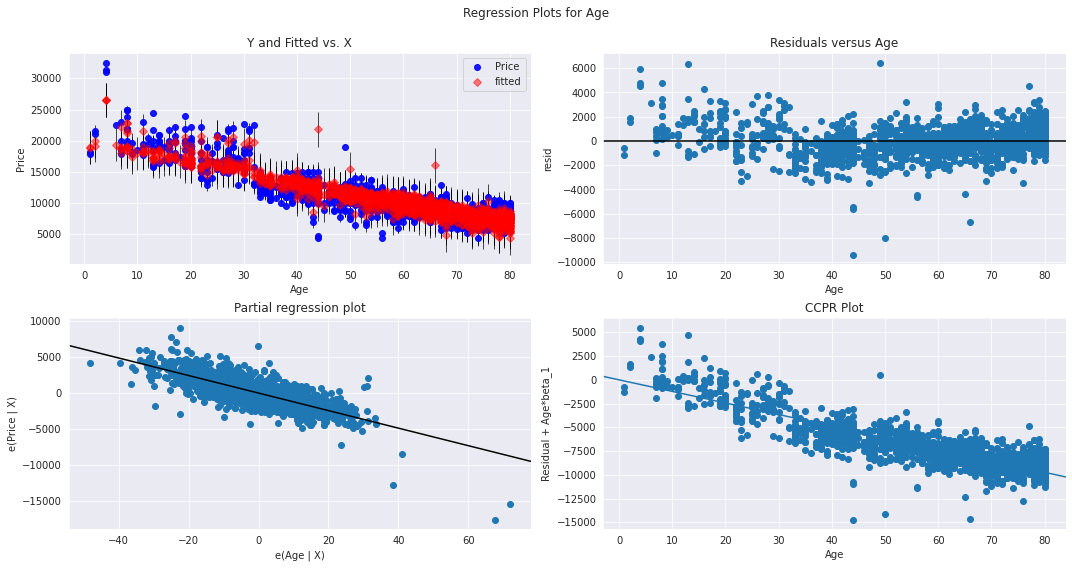

In [91]:
#Age+KM+HP+cc+Doors+Gears+QT+WT
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

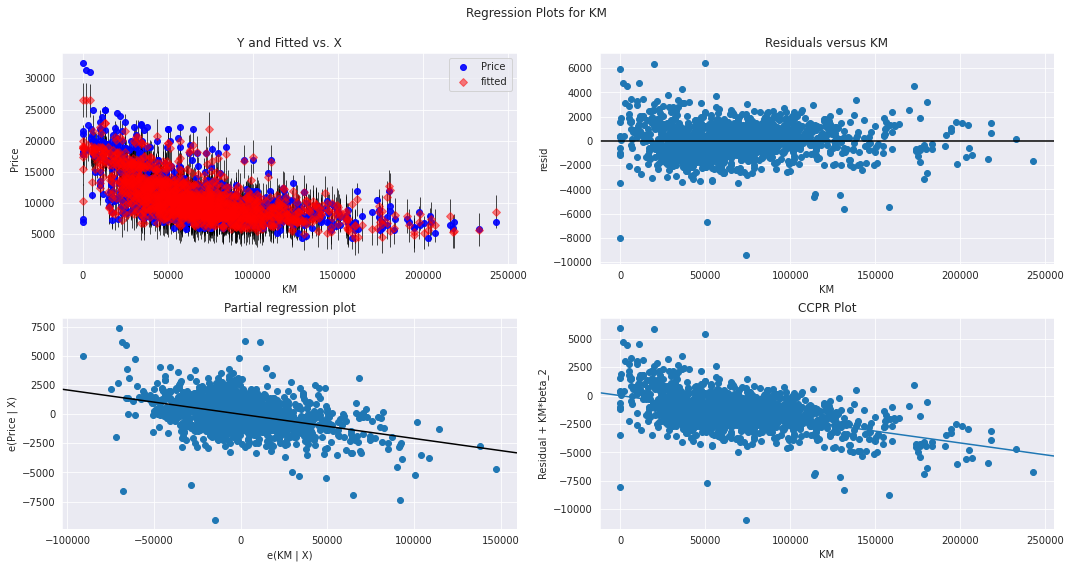

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

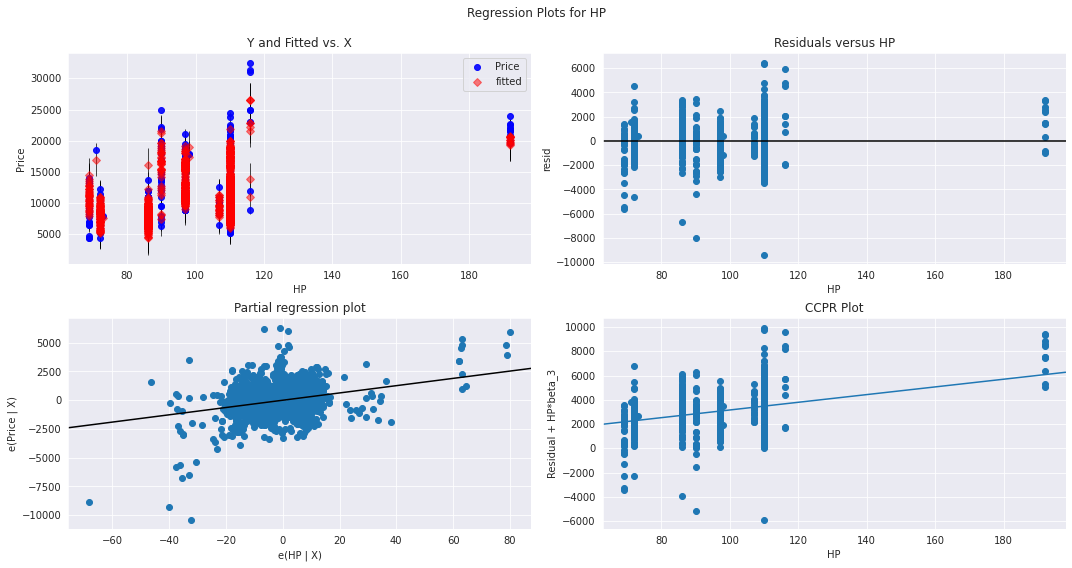

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

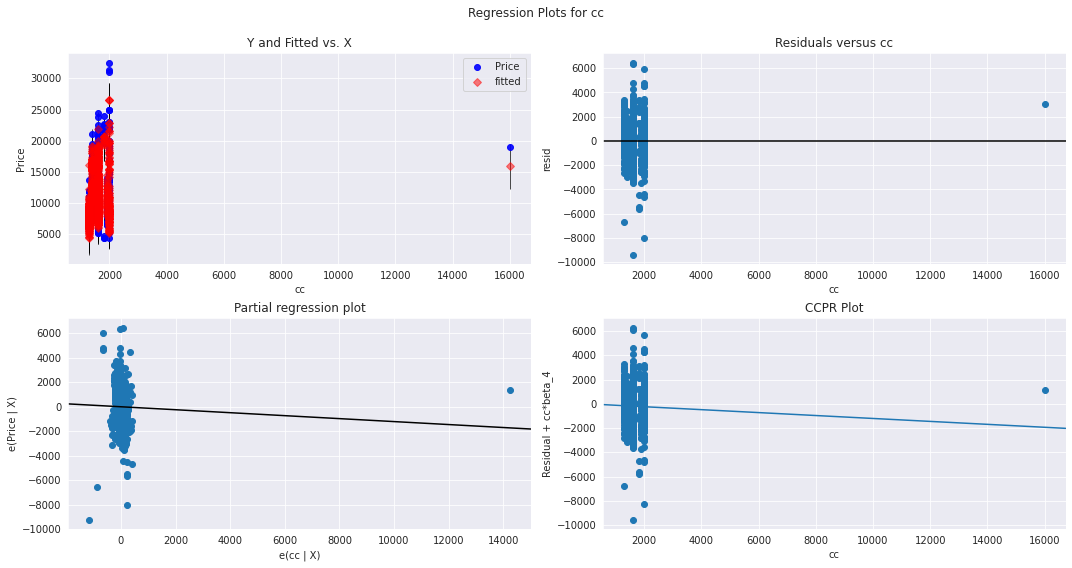

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

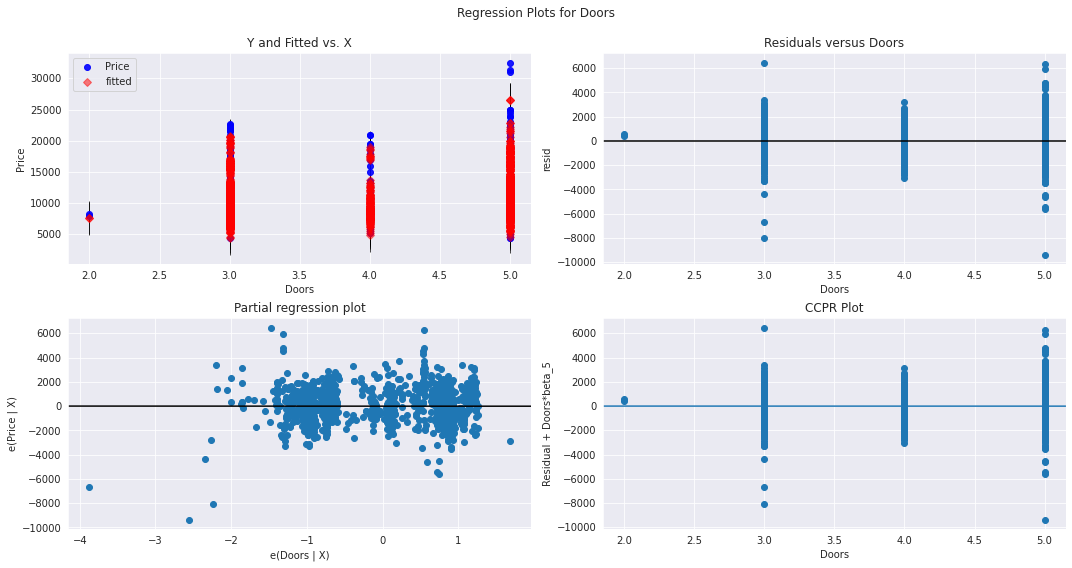

In [95]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

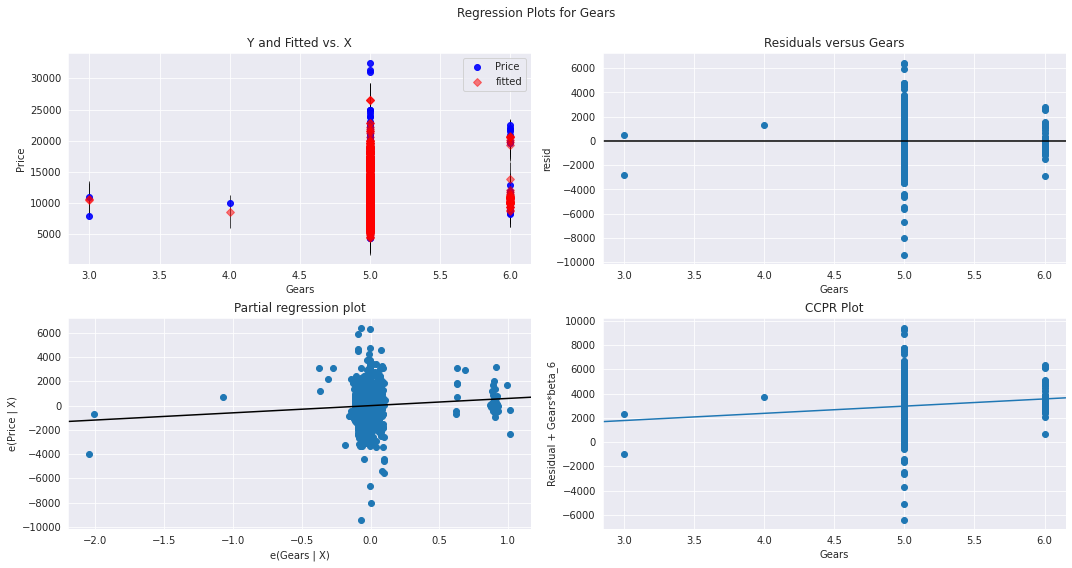

In [96]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

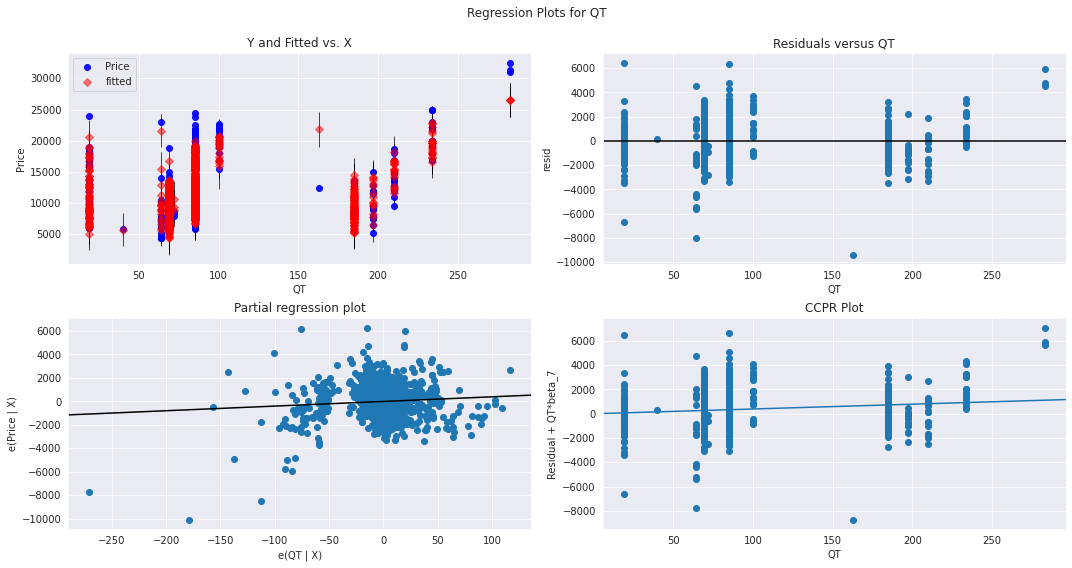

In [97]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

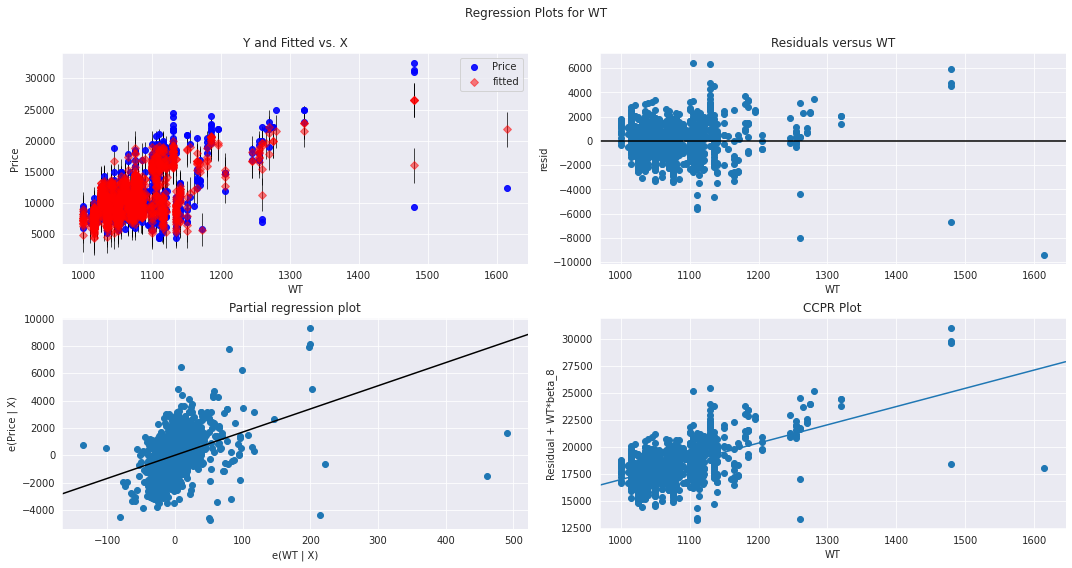

In [98]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influence/Outliers

## Cook's Distance

In [99]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


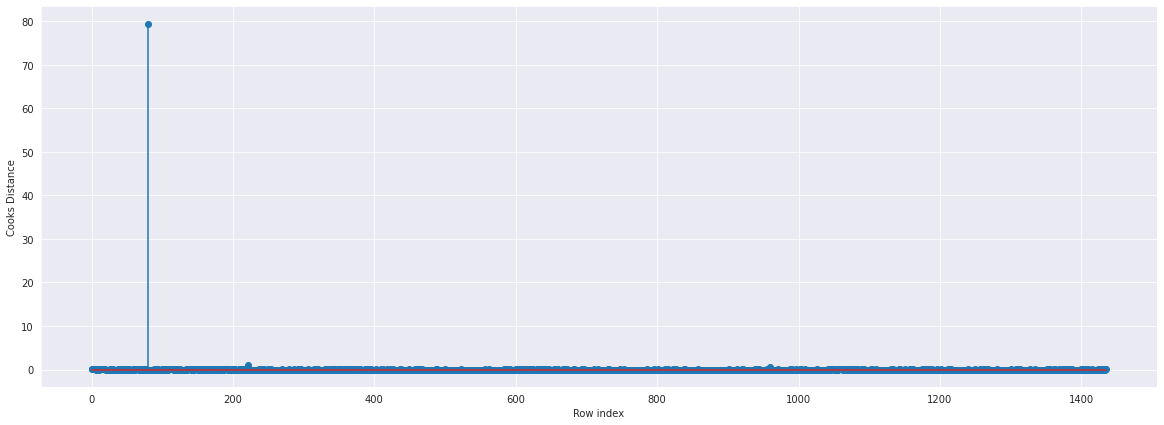

In [100]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [101]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624141955)

# High Influence Point

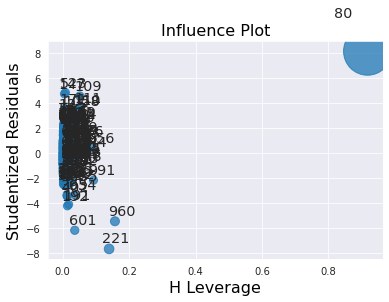

In [102]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [103]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

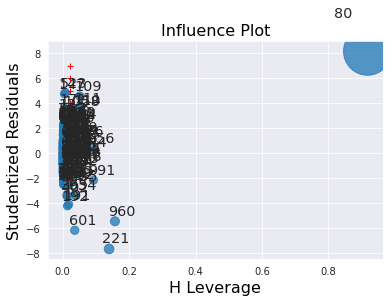

In [104]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,aplha=0.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

From the above plot, it is evident that data point 80 is the influencers

In [105]:
data1[data1.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


In [106]:
data1.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [107]:
data1.shape

(1436, 9)

# Improving the model

In [108]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2=data1.drop(data1.index[[80]],axis=0).reset_index()

In [109]:
#Drop the original index
data2=data2.drop(['index'],axis=1)

In [110]:
data2

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


While we calculated pvalues 
cc  - 1.790902e-01 < 0.05 = False   AND    
Doors - 9.677716e-01 < 0.05 = False  were calculated non-important so to see collinearity calculate R-square and AIC Value

In [111]:
#Exclude variable "cc" and generate R-Squared and AIC values
final_ml_cc= smf.ols('Price~Age+KM+HP+Doors+Gears+QT+WT',data = data2).fit()

In [112]:
(final_ml_cc.rsquared,final_ml_cc.aic,final_ml_cc.bic)

(0.8631959819380925, 24751.649416173997, 24793.800777199547)

In [113]:
#Exclude variable "cc" and generate R-Squared and AIC values
final_ml_G= smf.ols('Price~Age+KM+HP+Doors+cc+QT+WT',data = data2).fit()

In [114]:
(final_ml_G.rsquared,final_ml_G.aic,final_ml_G.bic)

(0.8687030416895446, 24692.688478469398, 24734.839839494947)

by above result comparing R-square and AIC values, the model with GEARS has high R-squared and low AIC value, so when we involve  the multi collinearity prb maybe solved

# Cook's Distance

In [115]:
model_influence_G=final_ml_G.get_influence()
(c_V,_)=model_influence_G.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


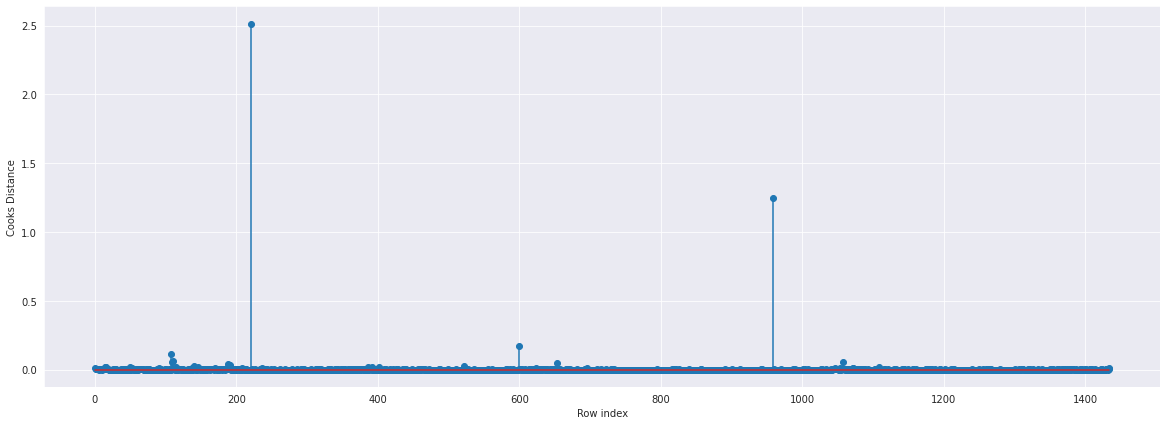

In [116]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()  

In [117]:
(np.argmax(c_V),np.max(c_V))
# index of data points where c is more than 0.5

(220, 2.513608764764856)

In [118]:
data2=data2.drop(data2.index[[220]],axis=0)
# drop 220 observation

In [119]:
data2

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [120]:
data3=data2.reset_index()
# reset the index and rearrange the row value

In [121]:
data3

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [122]:
final_ml_G= smf.ols('Price~Age+KM+HP+Doors+cc+QT+WT',data = data2).fit()

In [123]:
model_influence_G=final_ml_G.get_influence()
(c_V,_)=model_influence_G.cooks_distance
# again check for influencers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


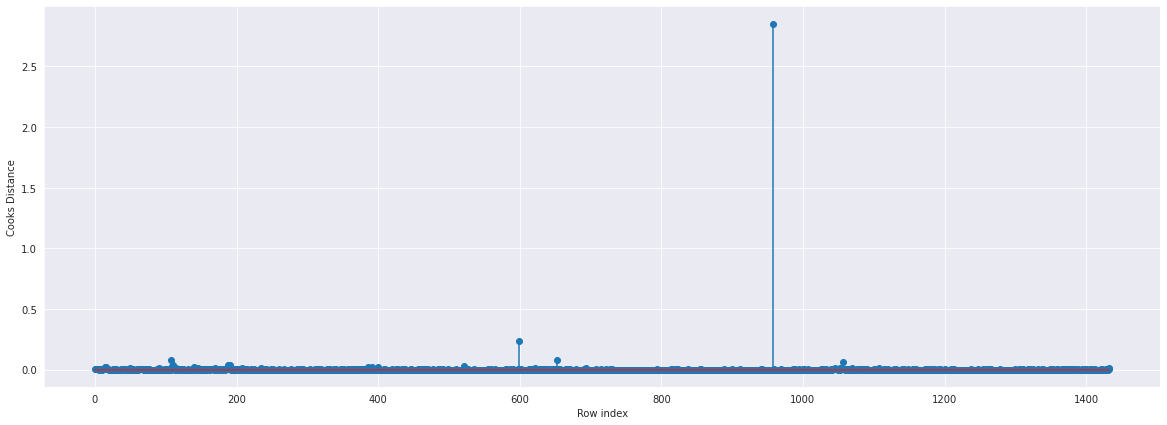

In [124]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [125]:
(np.argmax(c_V),np.max(c_V))
# index of data points where c is more than 0.5

(958, 2.8525133925946693)

In [126]:
data4=data3.drop(data3.index[[958]],axis=0)
# drop 958 observations

In [127]:
data4

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [128]:
data4=data4.reset_index()
# reset the index and rearrange the row value

In [129]:
data4=data4.drop(['level_0'],axis=1)

In [130]:
data4

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1430,7500,69,20544,86,1300,3,5,69,1025
1429,1431,10845,72,19000,86,1300,3,5,69,1015
1430,1432,8500,71,17016,86,1300,3,5,69,1015
1431,1433,7250,70,16916,86,1300,3,5,69,1015


In [131]:
final_ml_G= smf.ols('Price~Age+KM+HP+Doors+cc+QT+WT',data = data4).fit()

In [132]:
model_influence_G=final_ml_G.get_influence()
(c_V,_)=model_influence_G.cooks_distance
# again check for influencers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


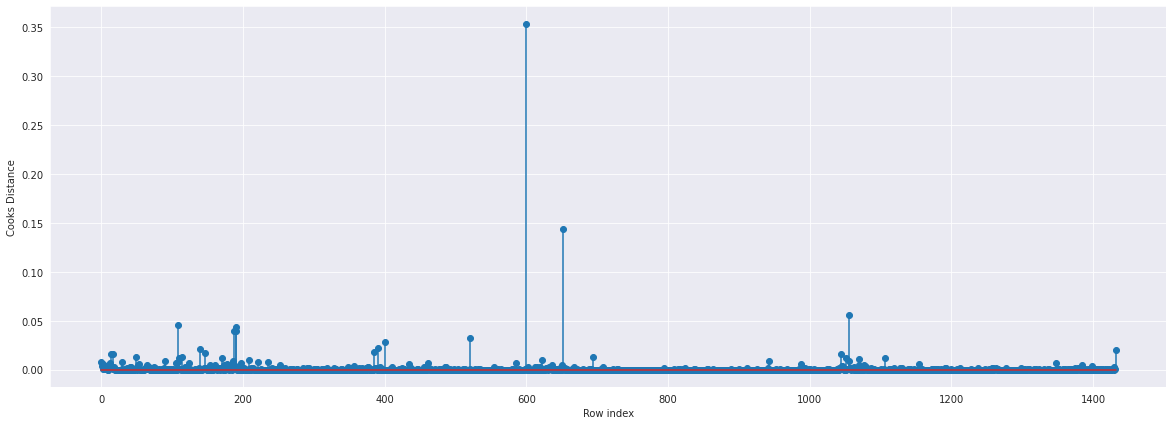

In [133]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [134]:
(np.argmax(c_V),np.max(c_V))
#index of the data points where c is more than .5

(599, 0.354142306623851)

In [135]:
data5=data4.drop(data4.index[[219]],axis=0)
# drop 219 observations

In [136]:
data5

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1430,7500,69,20544,86,1300,3,5,69,1025
1429,1431,10845,72,19000,86,1300,3,5,69,1015
1430,1432,8500,71,17016,86,1300,3,5,69,1015
1431,1433,7250,70,16916,86,1300,3,5,69,1015


# Since the value is <1 , we can stop the diagnostic process and finalize the model

In [137]:
#Check the accuracy of the mode
final_ml= smf.ols('Price~Age+KM+HP+Doors+cc+Gears+QT+WT',data =data5).fit()

In [138]:
(final_ml.rsquared,final_ml.aic)

(0.8851794528588717, 24453.601236932926)

# Predicting Price for dataset

In [139]:
pred_Price = final_ml.predict(data5)

In [140]:
pred_Price

0       16333.292624
1       15892.484296
2       16310.859726
3       15979.963664
4       15846.359609
            ...     
1428     9114.906734
1429     8498.693993
1430     8644.429564
1431     8758.163173
1432    10641.003099
Length: 1432, dtype: float64